In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2021-09-19 21:26:18.512085: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir = tf.keras.utils.get_file("cat_and_dog_filtered.zip", origin=_URL, extract=True)

In [5]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/home/aolei/.keras/datasets
/home/aolei/.keras/datasets/cats_and_dogs_filtered
/home/aolei/.keras/datasets/cats_and_dogs_filtered/validation
/home/aolei/.keras/datasets/cats_and_dogs_filtered/validation/cats
/home/aolei/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/home/aolei/.keras/datasets/cats_and_dogs_filtered/train
/home/aolei/.keras/datasets/cats_and_dogs_filtered/train/cats
/home/aolei/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [6]:
base_dir = os.path.join(os.path.dirname(zip_dir), "cats_and_dogs_filtered")
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_cat_dir = os.path.join(train_dir, "cats")
train_dog_dir = os.path.join(train_dir, "dogs")
validation_cat_dir = os.path.join(validation_dir, "cats")
validation_dog_dir = os.path.join(validation_dir, "dogs")

In [7]:
num_cats_tr = len(os.listdir(train_cat_dir))
num_dogs_tr = len(os.listdir(train_dog_dir))

num_cats_val = len(os.listdir(validation_cat_dir))
num_dogs_val = len(os.listdir(validation_dog_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print("total training cat images: ", num_cats_tr)
print("total training dog images: ", num_dogs_tr)

print("total validation cat images: ", num_cats_val)
print("total validation dog images: ", num_dogs_val)
print("--")
print("Total training images: ", total_train)
print("Total validation images: ", total_val)

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
--
Total training images:  2000
Total validation images:  1000


In [9]:
BATCH_SIZE = 10
IMG_SHAPE = 150

In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode="binary"
                                                          )
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode="binary"
                                                             )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
smaple_training_images, _ = next(train_data_gen)

In [13]:
def plotImage(images_arr):
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

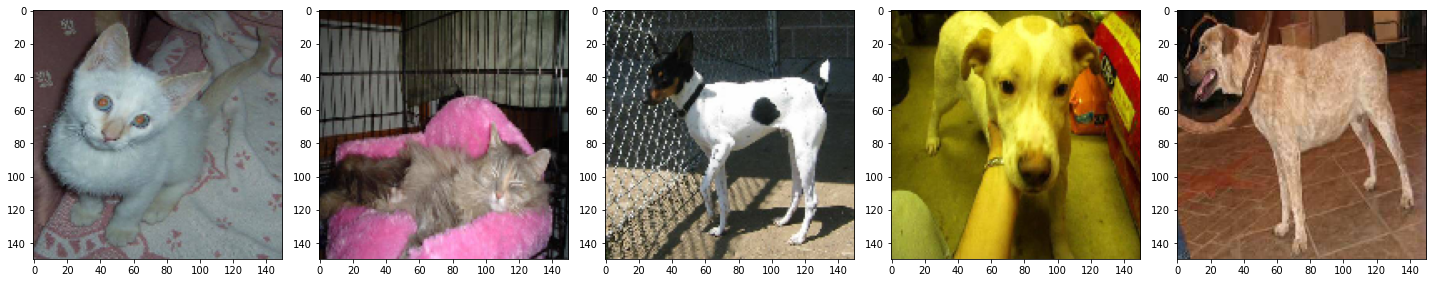

In [14]:
plotImage(smaple_training_images[:5])

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

2021-09-19 21:26:21.281776: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-19 21:26:21.282271: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-19 21:26:21.303756: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 21:26:21.304006: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 SUPER computeCapability: 7.5
coreClock: 1.65GHz coreCount: 34 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2021-09-19 21:26:21.304020: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-19 21:26:21.305340: I tensorflow/stream_executor/platfo

In [17]:
tf.test.is_gpu_available()

2021-09-19 21:26:27.747533: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-19 21:26:27.747959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 21:26:27.748590: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 SUPER computeCapability: 7.5
coreClock: 1.65GHz coreCount: 34 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2021-09-19 21:26:27.748665: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-19 21:26:27.748734: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-19 21:26:27.748797: I tensorflow/stream_executor/pla

True

read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 21:26:27.749272: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1862] Adding visible gpu devices: 0
2021-09-19 21:26:27.749293: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-09-19 21:26:27.749297: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2021-09-19 21:26:27.749300: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2021-09-19 21:26:27.749348: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-19 21:26:27.749481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

In [18]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
             )

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [20]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))),
)

/home/aolei/.conda/envs/dl/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-09-19 21:26:33.984488: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-19 21:26:34.003965: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


Epoch 1/100


2021-09-19 21:26:34.291130: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-19 21:26:34.569080: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-19 21:26:34.571111: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2021-09-19 21:26:35.328879: W tensorflow/core/framework/op_kernel.cc:1763] OP_REQUIRES failed at conv_ops_fused_impl.h:697 : Not found: No algorithm worked!


NotFoundError:  No algorithm worked!
	 [[node sequential/conv2d/Relu (defined at tmp/ipykernel_4911/648604864.py:7) ]] [Op:__inference_train_function_885]

Function call stack:
train_function


In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(EPOCHS)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training acc")
plt.plot(epochs_range, val_acc, label="Validation acc")
plt.legend("lower right")
plt.title("Training and Validation accuract")